# 拡散過程の可視化

`Section 03: Basics of Diffusion Model` の `Lecture 09: Denoising Diffusion Probabilistic Model (1)` にて紹介した拡散過程の可視化について紹介します。

## 可視化の準備

可視化で使用する画像をダウンロードしてきます。今回は講座内でも度々登場している画像生成 AI くんの画像を使用してみます。

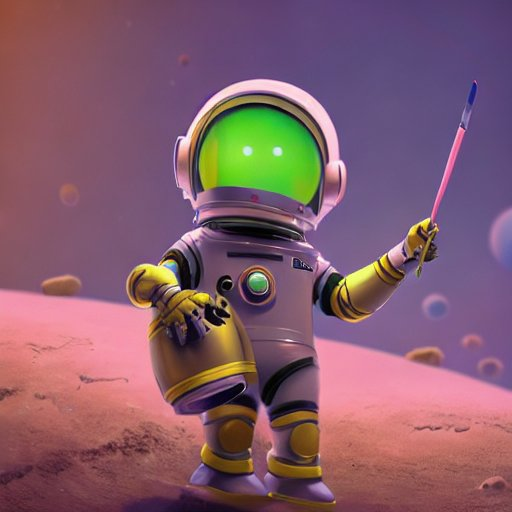

In [2]:
import requests
from PIL import Image
from PIL.Image import Image as PilImage

def download_image(url: str) -> PilImage:
    return Image.open(requests.get(url, stream=True).raw)

url = "https://github.com/shunk031/coloso-python-diffusion-models/blob/main/assets/image_generation_ai_kun.png?raw=true"
image = download_image(url)
image


## ノイズ画像への変換

以下の `convert_to_noise_image` 関数を使用して、オリジナル画像から指定したパラメータ $\sigma$ を元にノイズ画像を取得します。

In [ ]:
import numpy as np

def convert_to_noise_image(image_pl: PilImage, sigma: int) -> PilImage:
    # PIL 形式の画像を numpy 形式に変換
    image_np = np.array(image_pl)

    # 画像に乗せるノイズを正規分布からサンプリング
    noise = np.random.normal(0, sigma, image_np.shape)
    # numpy 形式に変換した画像にノイズを乗せる
    image_noise_np = image_np + np.floor(noise)

    # ノイズが乗ってピクセル値が 255 より大きくなっているところは 255 で埋める
    image_noise_np[image_noise_np > 255] = 255
    # 0 より小さくなっているところも同様の後処理を実施
    image_noise_np[image_noise_np < 0] = 0
    # numpy 形式から PIL 形式へ変換
    image_noise_pl = Image.fromarray(image_noise_np.astype(np.uint8))

    return image_noise_pl

## ノイズ画像の可視化

上記で定義した関数を使って、いくつかノイズ画像を生成してみます。sigma ($\sigma$) はノイズ量をコントロールするパラメータです。

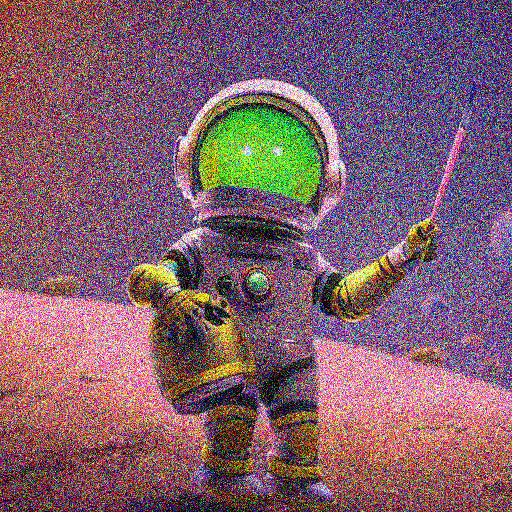

In [ ]:
convert_to_noise_image(image, sigma=70)

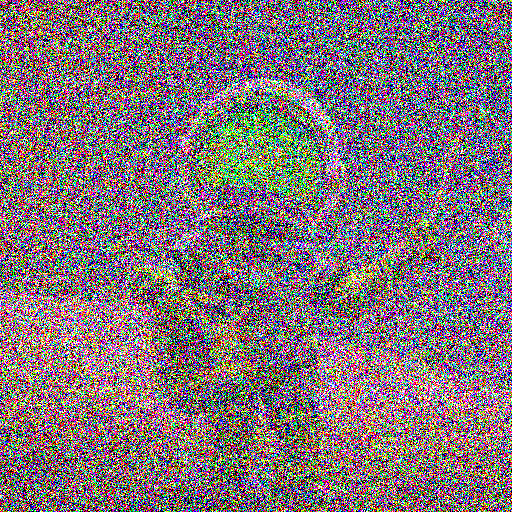

In [ ]:
convert_to_noise_image(image, sigma=300)

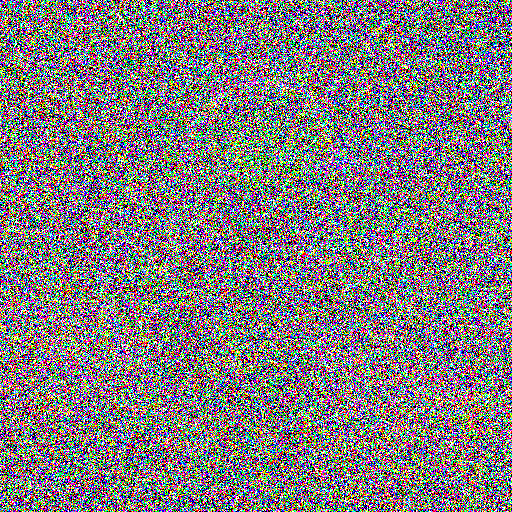

In [ ]:
convert_to_noise_image(image, sigma=1000)

## 逆拡散過程をアニメーション化

オリジナルの画像からノイズを乗せていく拡散過程に対して、ノイズから画像を生成する逆拡散過程によって拡散モデルは画像を生成していました。ここでは、拡散過程を逆にたどるようにしてノイズ画像をいくつか生成したのちに、それらの画像をつなぎ合わせてアニメーション GIF 画像を作成してみます。

### 複数のノイズ画像の作成

以下のようにして sigma のリストを作成し、それぞれの sigma におけるノイズ画像を生成しておきます。

In [ ]:
# sigma のリストを作成
sigma_list = np.logspace(0.4, 3.3, num=90)

# 各 sigma におけるノイズ画像のリストを作成
noise_image_list = [convert_to_noise_image(image, sigma=sigma) for sigma in sigma_list]

各ノイズ画像を一旦保存します。

In [ ]:
import os
from tqdm.auto import tqdm

# 画像保存先のパスを指定
save_dir = "diffusion_model_images"
os.makedirs(save_dir, exist_ok=True)

# 作成したノイズ画像を一旦保存
for i, noise_image in enumerate(tqdm(noise_image_list)):
    noise_image.save(os.path.join(save_dir, f"{i:03d}.png"))

  0%|          | 0/90 [00:00<?, ?it/s]

### アニメーション GIF 画像の作成

`imagemagick` をインストールすることで使用できる `convert` コマンドを使用することで、保存したノイズ画像群からアニメーション GIF 画像を作成します。

まずは `imagemagick` をインストールします。

In [ ]:
!apt-get install -yq imagemagick

Reading package lists...
Building dependency tree...
Reading state information...
imagemagick is already the newest version (8:6.9.11.60+dfsg-1.3ubuntu0.22.04.3).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


`convert` コマンドが使用できるようになったので、以下のようにして画像を保存したパスを指定し、`animation.gif` を作成します。

In [ ]:
!convert -delay 10 -loop 0 -reverse diffusion_model_images/*.png animation.gif

作成した `animation.gif` を読み込んで確認してみましょう。以下のようにしてノイズ画像から段階を経てきれいな画像が生成される、逆拡散過程をシミュレートしたアニメーション GIF 画像が作成されました。

In [ ]:
from IPython import display

display.Image("animation.gif", format="png")

Output hidden; open in https://colab.research.google.com to view.